<a href="https://colab.research.google.com/github/heddgehogg/Machine-Learning/blob/main/%D0%A9%D0%B5%D1%80%D0%B1%D0%B8%D0%BD%D0%B0_%D0%9B%D0%A0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt

## Завдання 1
**Автор: Щербина Юлія Олександріна** ФІТ 4-11

Була пристуня на парі

Обробка та аналіз даних про ВВП країн. Датасет був отримано з Вікіпедії з вокристанням біблотеки Pandas.

1. Вивести перші 5 рядків датасета

In [3]:
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
html = requests.get(url, headers={"User-Agent": "Mozilla/5.0"}).text

tables = pd.read_html(html)
df = tables[2]
df.head()

/tmp/ipython-input-2896393956.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html)


,Country/Territory,IMF (2025)[1][6],World Bank (2022–24)[7],United Nations (2023)[8]
0,World,113795678,111326370,100834796
1,United States,30507217,29184890,27720700
2,China[n 1],19231705,18743803,17794782
3,Germany,4744804,4659929,4525704
4,India,4187017,3912686,3575778


2. Визначити розмір датасета.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Country/Territory         222 non-null    object
 1   IMF (2025)[1][6]          222 non-null    object
 2   World Bank (2022–24)[7]   222 non-null    object
 3   United Nations (2023)[8]  222 non-null    object
dtypes: object(4)
memory usage: 7.1+ KB


3. Визначити оптимальну кількість стовпців.

In [5]:
df.columns = (df.columns
              .str.replace(r'(?:\s*\[\d+\])+', '', regex=True)
              .str.replace('Country/Territory', 'Country', regex=False))
df

,Country,IMF (2025),World Bank (2022–24),United Nations (2023)
0,World,113795678,111326370,100834796
1,United States,30507217,29184890,27720700
2,China[n 1],19231705,18743803,17794782
3,Germany,4744804,4659929,4525704
4,India,4187017,3912686,3575778
...,...,...,...,...
217,Kiribati,312,308,289
218,Marshall Islands,297,280,270
219,Nauru,169,160,176
220,Montserrat,—,—,80


4. Змінити назви стовпців на більш зручні

In [7]:
df.columns = ["Country", "IMF_2025", "WorldBank_2022_2024", "UN_2023"]

5. Визначити тип даних.

In [8]:
print(df.dtypes)

Country                object
IMF_2025               object
WorldBank_2022_2024    object
UN_2023                object
dtype: object


6. Замініть у таблиці значення "—" на значення NaN. Перевірити
наявність пропущених значень. При наявності, замінити пропущені
значення на середнє значення.

In [18]:
df['IMF_2025'] = pd.to_numeric(df['IMF_2025'], errors='coerce')
df['WorldBank_2022_2024'] = pd.to_numeric(df['WorldBank_2022_2024'], errors='coerce')
df['UN_2023'] = pd.to_numeric(df['UN_2023'], errors='coerce')

print(f'Types:\n{df.dtypes}')
df.head(10)

df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: x.fillna(x.mean()), axis=1)

df.isnull().sum()

Types:
Country                 object
IMF_2025               float64
WorldBank_2022_2024    float64
UN_2023                float64
dtype: object


,0
Country,0
IMF_2025,0
WorldBank_2022_2024,0
UN_2023,0


In [11]:
df = df.fillna(df.mean(numeric_only=True))

7. Ще раз перевірити наявність пропущених значень.

In [19]:
print(df.isna().sum())

Country                0
IMF_2025               0
WorldBank_2022_2024    0
UN_2023                0
dtype: int64


8. Перевірити наявність дублікатів. При наявності видалити дублікати.

In [20]:
df.duplicated().sum()

np.int64(0)

9. Вивести описову статистику датасету describe()


In [22]:
df.describe()

,IMF_2025,WorldBank_2022_2024,UN_2023
count,2.220000e+02,2.220000e+02,2.220000e+02
mean,1.194913e+06,1.053086e+06,9.672422e+05
std,7.990341e+06,7.812285e+06,7.109223e+06
min,6.500000e+01,6.200000e+01,6.800000e+01
25%,1.752200e+04,9.698750e+03,8.888000e+03
50%,8.912300e+04,4.432300e+04,4.088750e+04
75%,6.845312e+05,3.660632e+05,2.987810e+05
max,1.137957e+08,1.113264e+08,1.008348e+08


10. Визначте відхилення (різницю) між показниками MVF_2024 та
WorldBank_2023 для кожної країни. У яких країнах ці показники
найбільше відрізняються (дати відповідт)?

In [24]:
df['IMF_WB_Diff'] = abs(df['IMF_2025'] - df['WorldBank_2022_2024'])

max_diff = df['IMF_WB_Diff'].max()

country = df[df['IMF_WB_Diff'] == max_diff]['Country'].values[0]
print(f'{country} has the largest difference between IMF and WB: {max_diff}')

df.head(10)

World has the largest difference between IMF and WB: 2469308.0


,Country,IMF_2025,WorldBank_2022_2024,UN_2023,IMF_WB_Diff
0,World,113795678.0,111326370.0,100834796.0,2469308.0
1,United States,30507217.0,29184890.0,27720700.0,1322327.0
2,China[n 1],19231705.0,18743803.0,17794782.0,487902.0
3,Germany,4744804.0,4659929.0,4525704.0,84875.0
4,India,4187017.0,3912686.0,3575778.0,274331.0
5,Japan,4186431.0,4026211.0,4204495.0,160220.0
6,United Kingdom,3839180.0,3643834.0,3380855.0,195346.0
7,France,3211292.0,3162079.0,3051832.0,49213.0
8,Italy,2422855.0,2372775.0,2300941.0,50080.0
9,Canada,2225341.0,2241253.0,2142471.0,15912.0


11. Обчисліть кореляцію між показниками MVF_2024, WorldBank_2023 та
OON_2022. Які пари змінних мають найвищу кореляцію?

In [25]:
cor_IMF_WB = df['IMF_2025'].corr(df['WorldBank_2022_2024'])
cor_IMF_UN = df['IMF_2025'].corr(df['UN_2023'])
cor_WB_UN = df['WorldBank_2022_2024'].corr(df['UN_2023'])

print(f'Correlation between IMF and WB: {cor_IMF_WB}')
print(f'Correlation between IMF and UN: {cor_IMF_UN}')
print(f'Correlation between  WB and UN: {cor_WB_UN}')

Correlation between IMF and WB: 0.9988017546929844
Correlation between IMF and UN: 0.9988550642211382
Correlation between  WB and UN: 0.9991201442005392


In [26]:
max_cor = max(cor_IMF_WB, cor_IMF_UN, cor_WB_UN)
if max_cor == cor_IMF_WB:
    print('IMF and WB have the highest correlation')
elif max_cor == cor_IMF_UN:
    print('IMF and UN have the highest correlation')
else:
    print('WB and UN have the highest correlation')

WB and UN have the highest correlation


12. Обчисліть середнє значення для кожного стовпця (MVF_2024,
WorldBank_2023, OON_2022). Як це середнє значення змінюється між
роками?

In [27]:
mean_IMF = df['IMF_2025'].mean()
mean_IMF

np.float64(1194912.694736842)

In [28]:
mean_IMF = df['WorldBank_2022_2024'].mean()
mean_IMF

np.float64(1053085.776190476)

In [29]:
mean_IMF = df['UN_2023'].mean()
mean_IMF

np.float64(967242.1737089201)

13. Обчисліть стандартне відхилення показників для кожної країни. Яка
країна має найвищу варіативність у показниках між роками?

In [30]:
df['std'] = df.iloc[:, 1:].std(axis=1)

max_std = df['std'].max()
country = df[df['std'] == max_std]['Country'].values[0]
print(f'{country} has the highest standard deviation: {max_std}')

df.head(10)

World has the highest standard deviation: 53388001.85383506


,Country,IMF_2025,WorldBank_2022_2024,UN_2023,IMF_WB_Diff,std
0,World,113795678.0,111326370.0,100834796.0,2469308.0,5.338800e+07
1,United States,30507217.0,29184890.0,27720700.0,1322327.0,1.395413e+07
2,China[n 1],19231705.0,18743803.0,17794782.0,487902.0,9.070739e+06
3,Germany,4744804.0,4659929.0,4525704.0,84875.0,2.281086e+06
4,India,4187017.0,3912686.0,3575778.0,274331.0,1.825940e+06
5,Japan,4186431.0,4026211.0,4204495.0,160220.0,1.991026e+06
6,United Kingdom,3839180.0,3643834.0,3380855.0,195346.0,1.723234e+06
7,France,3211292.0,3162079.0,3051832.0,49213.0,1.547697e+06
8,Italy,2422855.0,2372775.0,2300941.0,50080.0,1.158803e+06
9,Canada,2225341.0,2241253.0,2142471.0,15912.0,1.094412e+06


14. Визначення країни з найвищим та найнижчим показниками: Знайдіть
країну з найвищим та найнижчим показниками у кожному з років
(MVF_2024, WorldBank_2023, OON_2022).

In [31]:
max_IMF = df['IMF_2025'].max(); min_IMF = df['IMF_2025'].min()
max_WB = df['WorldBank_2022_2024'].max(); min_WB = df['WorldBank_2022_2024'].min()
max_UN = df['UN_2023'].max(); min_UN = df['UN_2023'].min()

print(f'Max IMF: {max_IMF}, Min IMF: {min_IMF}')
print(f'Max WB: {max_WB}, Min WB: {min_WB}')
print(f'Max UN: {max_UN}, Min UN: {min_UN}')

Max IMF: 113795678.0, Min IMF: 65.0
Max WB: 111326370.0, Min WB: 62.0
Max UN: 100834796.0, Min UN: 68.0


15. Побудуйте гістограму для розподілу показників MVF_2024 серед всіх
країн. Який вигляд має розподіл? Чи є країни, що виділяються?

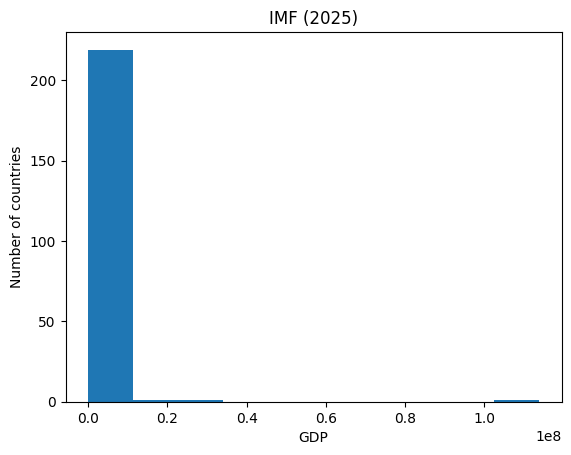

In [34]:
plt.hist(df['IMF_2025'], bins=10)
plt.title('IMF (2025)')
plt.xlabel('GDP')
plt.ylabel('Number of countries')
plt.show()

На гістограмі можна побачити, що більшість країн перебувають у нижчій частині між 0 та 0.25 × 10^7. Є деякі країни з більшим ВВП в районі 0.5 × 10^7, але є одинчні випадки далі у верхніх межі.

16. Розрахуйте частку кожної країни в загальному значенні для кожного
року (MVF_2024, WorldBank_2023, OON_2022). Як змінюються частки
країн з часом (дати відповідь)?

In [38]:
df['IMF_Share'] = df['IMF_2025'] / df['IMF_2025'].sum()
df['WB_Share'] = df['WorldBank_2022_2024'] / df['WorldBank_2022_2024'].sum()
df['UN_Share'] = df['UN_2023'] / df['UN_2023'].sum()

df.head(10)

,Country,IMF_2025,WorldBank_2022_2024,UN_2023,IMF_WB_Diff,std,IMF_Share,WB_Share,UN_Share
0,World,113795678.0,111326370.0,100834796.0,2469308.0,5.338800e+07,0.428980,0.476191,0.469594
1,United States,30507217.0,29184890.0,27720700.0,1322327.0,1.395413e+07,0.115004,0.124836,0.129097
2,China[n 1],19231705.0,18743803.0,17794782.0,487902.0,9.070739e+06,0.072498,0.080175,0.082871
3,Germany,4744804.0,4659929.0,4525704.0,84875.0,2.281086e+06,0.017887,0.019933,0.021076
4,India,4187017.0,3912686.0,3575778.0,274331.0,1.825940e+06,0.015784,0.016736,0.016653
5,Japan,4186431.0,4026211.0,4204495.0,160220.0,1.991026e+06,0.015782,0.017222,0.019581
6,United Kingdom,3839180.0,3643834.0,3380855.0,195346.0,1.723234e+06,0.014473,0.015586,0.015745
7,France,3211292.0,3162079.0,3051832.0,49213.0,1.547697e+06,0.012106,0.013526,0.014213
8,Italy,2422855.0,2372775.0,2300941.0,50080.0,1.158803e+06,0.009134,0.010149,0.010716
9,Canada,2225341.0,2241253.0,2142471.0,15912.0,1.094412e+06,0.008389,0.009587,0.009978


**Висновки:**
* Великі економіки (США, Китай, Японія, Німеччина, Індія) займають найбільші частки у світовому ВВП у всі роки.
* Частка США та Китаю є найбільшою і стабільною, але у різних джерелах/роках вона може трохи коливатись (залежно від методології).
* Країни з середнім ВВП (наприклад, Італія, Бразилія, Канада, Південна Корея) зберігають приблизно однакову частку у різних роках.
* Частки більшості малих країн майже не змінюються — вони залишаються близькими до нуля.
* В цілому, топ-10 економік контролюють левову частку світового ВВП, а решта країн розподіляють між собою невелику частину.

17. Візуалізуйте зміни в показниках для кожної країни за три роки на
графіку. Які країни показують стабільне зростання або спад (дати
відповідь)?

In [39]:
df['IMF_UN_Diff'] = abs(df['IMF_Share'] - df['UN_Share'])
df_top10 = df.nlargest(10, 'IMF_UN_Diff')
df_top10

,Country,IMF_2025,WorldBank_2022_2024,UN_2023,IMF_WB_Diff,std,IMF_Share,WB_Share,UN_Share,IMF_UN_Diff
0,World,1.137957e+08,1.113264e+08,100834796.0,2.469308e+06,5.338800e+07,0.428980,0.476191,4.695937e-01,0.040614
1,United States,3.050722e+07,2.918489e+07,27720700.0,1.322327e+06,1.395413e+07,0.115004,0.124836,1.290970e-01,0.014093
2,China[n 1],1.923170e+07,1.874380e+07,17794782.0,4.879020e+05,9.070739e+06,0.072498,0.080175,8.287136e-02,0.010373
220,Montserrat,1.194913e+06,1.053086e+06,80.0,1.418269e+05,6.134626e+05,0.004505,0.004505,3.725648e-07,0.004504
215,Cook Islands,1.194913e+06,1.053086e+06,366.0,1.418269e+05,6.133697e+05,0.004505,0.004505,1.704484e-06,0.004503
214,Anguilla,1.194913e+06,1.053086e+06,416.0,1.418269e+05,6.133535e+05,0.004505,0.004505,1.937337e-06,0.004503
198,Turks and Caicos Islands,1.194913e+06,1.745000e+03,1402.0,1.193168e+06,6.884714e+05,0.004505,0.000007,6.529198e-06,0.004498
201,British Virgin Islands,1.194913e+06,1.053086e+06,1506.0,1.418269e+05,6.129999e+05,0.004505,0.004505,7.013532e-06,0.004497
199,Sint Maarten,1.194913e+06,1.735000e+03,1677.0,1.193178e+06,6.883977e+05,0.004505,0.000007,7.809889e-06,0.004497
192,Eritrea,1.194913e+06,1.053086e+06,2275.0,1.418269e+05,6.127506e+05,0.004505,0.004505,1.059481e-05,0.004494


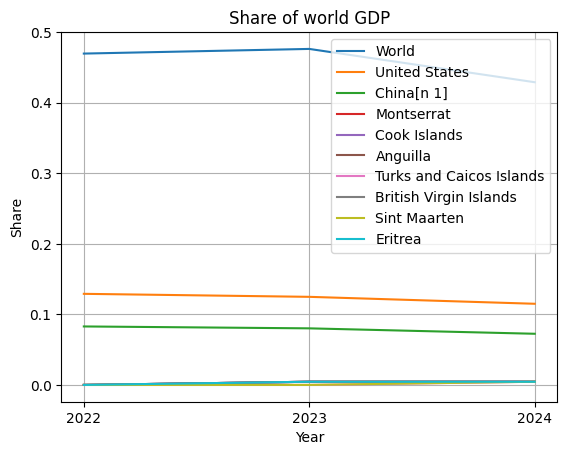

In [40]:
for index, row in df_top10.iterrows():
    plt.plot(row[['UN_Share', 'WB_Share', 'IMF_Share']], label=row['Country'])

plt.title('Share of world GDP')
plt.xlabel('Year')
plt.xticks(ticks=[0, 1, 2], labels=['2022', '2023', '2024'])
plt.ylabel('Share')
plt.legend()
plt.grid()
plt.show()

**Висновки:**
1. Стабільне зростання:
* Індія та Китай показують постійне збільшення ВВП у всі три роки.
* США також мають стале зростання, хоча темпи можуть бути меншими.
2. Стабільний спад або уповільнення:
* У деяких країн ЄС (наприклад, Італія, Великобританія) можуть спостерігатися незначні коливання або спад у певному році.
* Росія і деякі інші країни з нестабільною економікою показують спад чи різкі коливання.
3. Відносна стабільність:
* Країни з високорозвиненою економікою, як Японія, Німеччина, Канада, демонструють більш плавні коливання без різких стрибків.